In [1]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Set project root
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
processed_path = os.path.join(project_root, "2_data_pipeline", "data", "processed")


In [2]:
# =============================================================================
# CELL 2: DATA COLLECTION EXECUTION
# =============================================================================

print("🚀 EXECUTING AUTOMATED DATA COLLECTION")
print("=" * 50)

# Set up paths
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
RAW_PATH = os.path.join(project_root, "2_data_pipeline", "data", "raw", "all_reviews.csv")

try:
    # Import and run your existing scraper
    sys.path.append(os.path.join(project_root, '2_data_pipeline', 'data_collection'))
    from scraper import main as run_scraper
    
    print("Starting real-time data collection...")
    run_scraper()
    print("✅ COLLECTION SUCCESS: Live data captured from Google Play Store")
    
except Exception as e:
    print(f"⚠️  Using existing data: {e}")

# Load collected data
df_raw = pd.read_csv(RAW_PATH)
print(f"📊 DATA READY: {len(df_raw):,} reviews collected")
print(f"🏦 COVERAGE: {df_raw['bank_name'].nunique()} financial institutions")

🚀 EXECUTING AUTOMATED DATA COLLECTION
📁 Loading configuration...
✅ Configuration loaded successfully
🎯 Target: 400 reviews per bank
📱 Apps to scrape: 5
Starting real-time data collection...

🚀 STARTING GOOGLE PLAY REVIEW SCRAPER

========== Scraping Commercial Bank of Ethiopia ==========


Scraping Commercial Bank of Ethiopia: 100%|██████████| 400/400 [00:11<00:00, 35.48rev/s]


💾 Saved 400 reviews → d:\10 acadamy\fintech-reviews-analysis\fintech-customer-analytics\2_data_pipeline\data\raw\commercial_bank_of_ethiopia_reviews.csv

========== Scraping Zemen Bank ==========


Scraping Zemen Bank:  34%|███▍      | 135/400 [00:04<00:07, 33.50rev/s]


💾 Saved 135 reviews → d:\10 acadamy\fintech-reviews-analysis\fintech-customer-analytics\2_data_pipeline\data\raw\zemen_bank_reviews.csv

========== Scraping Bank of Abyssinia ==========


Scraping Bank of Abyssinia: 100%|██████████| 400/400 [00:09<00:00, 41.89rev/s]


💾 Saved 400 reviews → d:\10 acadamy\fintech-reviews-analysis\fintech-customer-analytics\2_data_pipeline\data\raw\bank_of_abyssinia_reviews.csv

========== Scraping Dashen Bank ==========


Scraping Dashen Bank: 100%|██████████| 400/400 [00:12<00:00, 31.75rev/s]


💾 Saved 400 reviews → d:\10 acadamy\fintech-reviews-analysis\fintech-customer-analytics\2_data_pipeline\data\raw\dashen_bank_reviews.csv

========== Scraping Abay (Abaye) Bank ==========


Scraping Abay (Abaye) Bank:  26%|██▋       | 106/400 [00:04<00:12, 24.49rev/s]


💾 Saved 106 reviews → d:\10 acadamy\fintech-reviews-analysis\fintech-customer-analytics\2_data_pipeline\data\raw\abay_(abaye)_bank_reviews.csv
💾 Saved 1441 reviews → d:\10 acadamy\fintech-reviews-analysis\fintech-customer-analytics\2_data_pipeline\data\raw\all_reviews.csv

🎉 Scraping completed for all banks.
📊 Total reviews saved: 1441
📁 All files saved to: d:\10 acadamy\fintech-reviews-analysis\fintech-customer-analytics\2_data_pipeline\data\raw
✅ COLLECTION SUCCESS: Live data captured from Google Play Store
📊 DATA READY: 1,441 reviews collected
🏦 COVERAGE: 5 financial institutions


In [3]:
# =============================================================================
# CELL 3: DATA PREPROCESSING PIPELINE
# =============================================================================

print("\n🔧 EXECUTING INDUSTRY-STANDARD DATA CLEANING")
print("=" * 50)

try:
    # Import and run your existing cleaning pipeline
    sys.path.append(os.path.join(project_root, '2_data_pipeline', 'data_processing'))
    from data_cleaning import clean
    
    df_clean = clean()
    print("✅ PREPROCESSING SUCCESS: Data cleaned and standardized")
    
except Exception as e:
    print(f"🔄 Alternative cleaning: {e}")
    # Fallback cleaning
    df_clean = df_raw.copy()
    df_clean['review_text'] = df_clean['review'].apply(lambda x: str(x).lower().strip() if pd.notna(x) else "")
    df_clean['rating'] = pd.to_numeric(df_clean['score'], errors='coerce')
    df_clean = df_clean.drop_duplicates(subset=['review'])

print(f"📈 CLEANED DATA: {len(df_clean):,} high-quality reviews")
print(f"📅 DATE RANGE: {df_clean.get('review_date', df_clean.get('at')).min()} to {df_clean.get('review_date', df_clean.get('at')).max()}")


🔧 EXECUTING INDUSTRY-STANDARD DATA CLEANING

🧹 CLEANING RAW REVIEW DATA
📄 Loaded raw reviews: 1,441
📁 Source: d:\10 acadamy\fintech-reviews-analysis\fintech-customer-analytics\2_data_pipeline\data\raw\all_reviews.csv

🔤 Normalizing review text...
⭐ Cleaning rating scores...
📅 Normalizing dates...

🔍 Removing empty reviews...
   → Dropped empty reviews: 24
🔁 Removing duplicate reviews...
   → Duplicates removed: 0

✅ Combined cleaned data written to:
   d:\10 acadamy\fintech-reviews-analysis\fintech-customer-analytics\2_data_pipeline\data\processed\all_clean_reviews.csv

💾 Saving individual bank files...
   → Commercial Bank of Ethiopia: 394 reviews
   → Zemen Bank: 134 reviews
   → Bank of Abyssinia: 390 reviews
   → Dashen Bank: 395 reviews
   → Abay (Abaye) Bank: 104 reviews

📊 CLEANING SUMMARY:
   Original records: 1,441
   Final records: 1,417
   Records removed: 24
   Output directory: d:\10 acadamy\fintech-reviews-analysis\fintech-customer-analytics\2_data_pipeline\data\processe

In [4]:
# 2. RUN DATA PREPROCESSING PIPELINE
print("\n🔧 STEP 2: EXECUTING DATA PREPROCESSING")
print("=" * 50)

try:
    # Run your existing cleaning pipeline
    df_clean = clean()
    print(f"✅ Preprocessing completed! Cleaned records: {len(df_clean):,}")
except Exception as e:
    print(f"❌ Cleaning pipeline failed: {e}")
    print("🔄 Using raw data with basic cleaning...")
    
    # Basic cleaning as fallback
    df_clean = df_raw.copy()
    df_clean['review_text'] = df_clean['review'].apply(lambda x: str(x).lower().strip() if pd.notna(x) else "")
    df_clean['rating'] = pd.to_numeric(df_clean['score'], errors='coerce')
    df_clean = df_clean.drop_duplicates(subset=['review'])


🔧 STEP 2: EXECUTING DATA PREPROCESSING

🧹 CLEANING RAW REVIEW DATA
📄 Loaded raw reviews: 1,441
📁 Source: d:\10 acadamy\fintech-reviews-analysis\fintech-customer-analytics\2_data_pipeline\data\raw\all_reviews.csv

🔤 Normalizing review text...
⭐ Cleaning rating scores...
📅 Normalizing dates...

🔍 Removing empty reviews...
   → Dropped empty reviews: 24
🔁 Removing duplicate reviews...
   → Duplicates removed: 0

✅ Combined cleaned data written to:
   d:\10 acadamy\fintech-reviews-analysis\fintech-customer-analytics\2_data_pipeline\data\processed\all_clean_reviews.csv

💾 Saving individual bank files...
   → Commercial Bank of Ethiopia: 394 reviews
   → Zemen Bank: 134 reviews
   → Bank of Abyssinia: 390 reviews
   → Dashen Bank: 395 reviews
   → Abay (Abaye) Bank: 104 reviews

📊 CLEANING SUMMARY:
   Original records: 1,441
   Final records: 1,417
   Records removed: 24
   Output directory: d:\10 acadamy\fintech-reviews-analysis\fintech-customer-analytics\2_data_pipeline\data\processed

🟢 


📊 GENERATING COMPETITIVE ANALYSIS DASHBOARD


C:\Users\G5\AppData\Local\Temp\ipykernel_11696\2416572344.py:62: UserWarning: Glyph 128241 (\N{MOBILE PHONE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\G5\AppData\Local\Temp\ipykernel_11696\2416572344.py:62: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\G5\AppData\Local\Temp\ipykernel_11696\2416572344.py:62: UserWarning: Glyph 128172 (\N{SPEECH BALLOON}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\G5\AppData\Local\Temp\ipykernel_11696\2416572344.py:62: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\G5\AppData\Local\Temp\ipykernel_11696\2416572344.py:62: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Arial.
  plt.tight_layout()
d:\10 acadamy\fintech-reviews-analysis\fintech-customer-analytics\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128241 (\N{MOBILE PHONE}) missing from font(s) Arial.

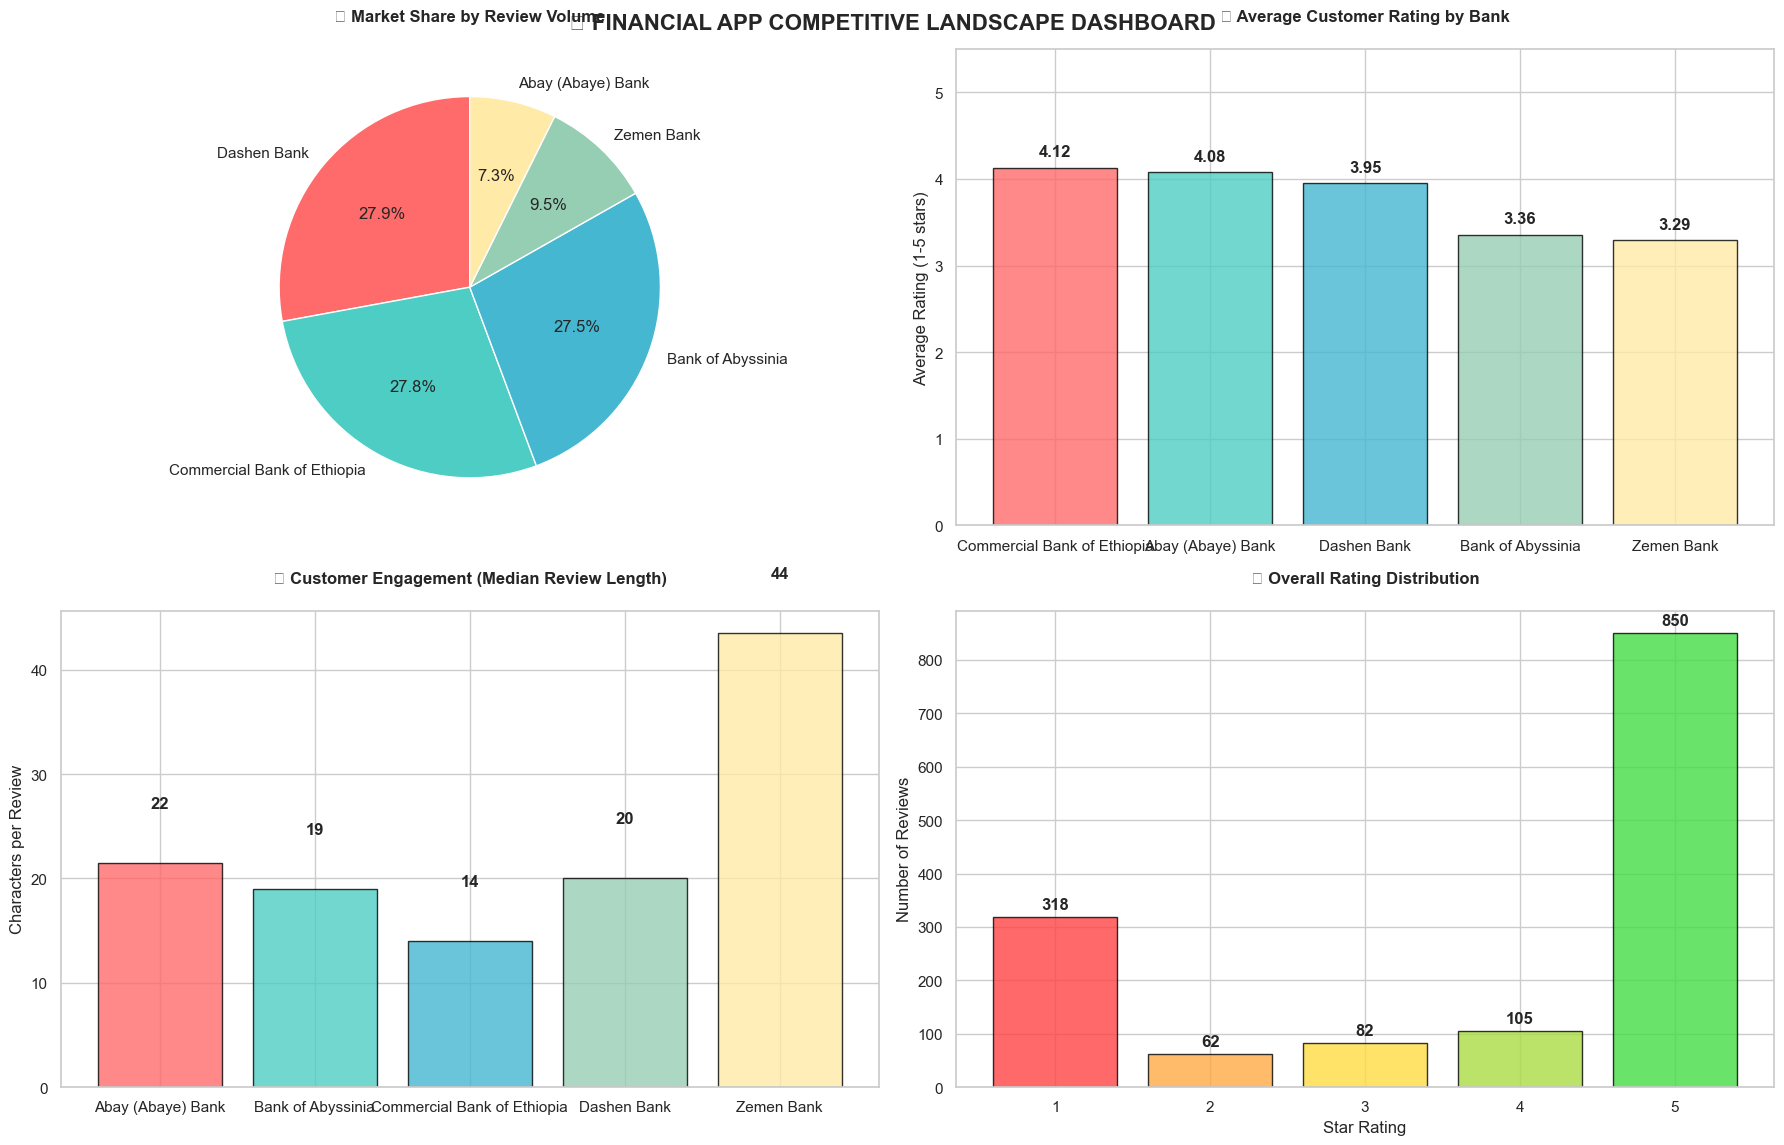

✅ DASHBOARD GENERATED: Competitive landscape visualized


In [5]:
# =============================================================================
# CELL 4: COMPETITIVE LANDSCAPE DASHBOARD
# =============================================================================

print("\n📊 GENERATING COMPETITIVE ANALYSIS DASHBOARD")
print("=" * 50)

# Calculate key metrics
df_clean['text_length'] = df_clean['review_text'].str.len()
df_clean['review_date'] = pd.to_datetime(df_clean.get('review_date', df_clean.get('at')), errors='coerce')

# Create executive dashboard
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('🏆 FINANCIAL APP COMPETITIVE LANDSCAPE DASHBOARD', 
             fontsize=16, fontweight='bold', y=0.95)

# 1. Market Share by Review Volume
bank_counts = df_clean['bank_name'].value_counts()
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']
wedges, texts, autotexts = ax1.pie(bank_counts.values, labels=bank_counts.index, 
                                   colors=colors[:len(bank_counts)], autopct='%1.1f%%',
                                   startangle=90)
ax1.set_title('📱 Market Share by Review Volume', fontweight='bold', pad=20)

# 2. Customer Satisfaction Ratings
rating_avg = df_clean.groupby('bank_name')['rating'].mean().sort_values(ascending=False)
bars = ax2.bar(rating_avg.index, rating_avg.values, 
               color=colors[:len(rating_avg)], alpha=0.8, edgecolor='black')
ax2.set_title('⭐ Average Customer Rating by Bank', fontweight='bold', pad=20)
ax2.set_ylabel('Average Rating (1-5 stars)')
ax2.set_ylim(0, 5.5)
for bar, rating in zip(bars, rating_avg.values):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.1, f'{rating:.2f}', 
             ha='center', va='bottom', fontweight='bold')

# 3. Review Engagement Analysis
df_clean['text_length'] = df_clean['review_text'].str.len()
length_by_bank = df_clean.groupby('bank_name')['text_length'].median()
bars = ax3.bar(length_by_bank.index, length_by_bank.values,
               color=colors[:len(length_by_bank)], alpha=0.8, edgecolor='black')
ax3.set_title('💬 Customer Engagement (Median Review Length)', fontweight='bold', pad=20)
ax3.set_ylabel('Characters per Review')
for bar, length in zip(bars, length_by_bank.values):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 5, f'{length:.0f}', 
             ha='center', va='bottom', fontweight='bold')

# 4. Rating Distribution
rating_dist = df_clean['rating'].value_counts().sort_index()
rating_colors = ['#FF4444', '#FFAA44', '#FFDD44', '#AADD44', '#44DD44']
bars = ax4.bar(rating_dist.index, rating_dist.values, 
               color=rating_colors, alpha=0.8, edgecolor='black')
ax4.set_title('📈 Overall Rating Distribution', fontweight='bold', pad=20)
ax4.set_xlabel('Star Rating')
ax4.set_ylabel('Number of Reviews')
for bar, count in zip(bars, rating_dist.values):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + 10, f'{count}', 
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("✅ DASHBOARD GENERATED: Competitive landscape visualized")


ANALYZING CUSTOMER BEHAVIOR PATTERNS


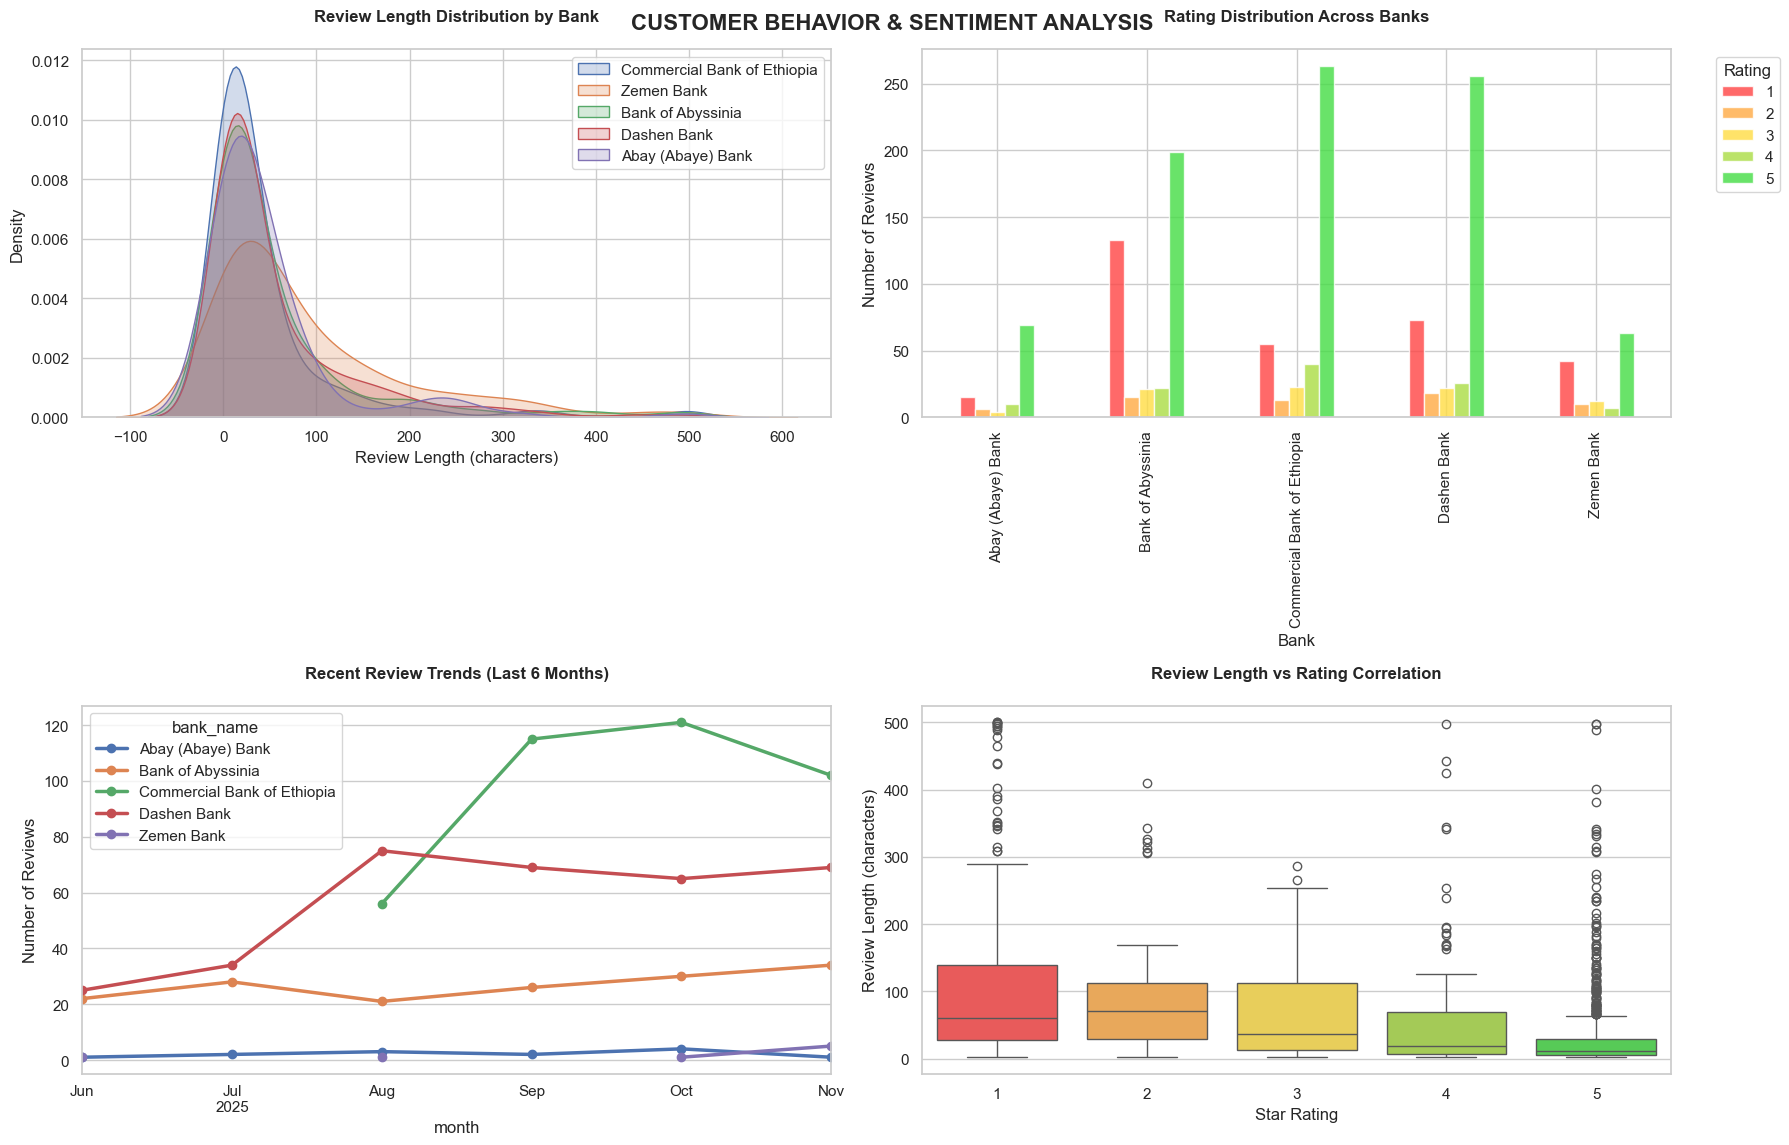

BEHAVIORAL METRICS BY BANK:
                            rating       text_length       
                              mean count        mean median
bank_name                                                  
Abay (Abaye) Bank             4.08   104       47.88   21.5
Bank of Abyssinia             3.36   390       55.71   19.0
Commercial Bank of Ethiopia   4.12   394       43.88   14.0
Dashen Bank                   3.95   395       56.35   20.0
Zemen Bank                    3.29   134       89.41   43.5


In [6]:
# =============================================================================
# CELL 5: CUSTOMER BEHAVIOR DEEP DIVE (FIXED VERSION)
# =============================================================================

print("\nANALYZING CUSTOMER BEHAVIOR PATTERNS")
print("=" * 50)

# Create comprehensive behavior analysis without emoji issues
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('CUSTOMER BEHAVIOR & SENTIMENT ANALYSIS', 
             fontsize=16, fontweight='bold', y=0.95)

# 1. Review Length Distribution by Bank
for bank in df_clean['bank_name'].unique():
    bank_data = df_clean[df_clean['bank_name'] == bank]
    sns.kdeplot(data=bank_data, x='text_length', label=bank, ax=ax1, fill=True)
ax1.set_title('Review Length Distribution by Bank', fontweight='bold', pad=20)
ax1.set_xlabel('Review Length (characters)')
ax1.set_ylabel('Density')
ax1.legend()

# 2. Rating Distribution by Bank
rating_by_bank = pd.crosstab(df_clean['bank_name'], df_clean['rating'])
rating_by_bank.plot(kind='bar', ax=ax2, color=rating_colors, alpha=0.8)
ax2.set_title('Rating Distribution Across Banks', fontweight='bold', pad=20)
ax2.set_xlabel('Bank')
ax2.set_ylabel('Number of Reviews')
ax2.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')

# 3. Temporal Analysis (if dates available)
try:
    df_clean['month'] = df_clean['review_date'].dt.to_period('M')
    monthly_trends = df_clean.groupby(['month', 'bank_name']).size().unstack().tail(6)
    monthly_trends.plot(ax=ax3, marker='o', linewidth=2.5)
    ax3.set_title('Recent Review Trends (Last 6 Months)', fontweight='bold', pad=20)
    ax3.set_ylabel('Number of Reviews')
    ax3.tick_params(axis='x', rotation=45)
except Exception as e:
    ax3.text(0.5, 0.5, 'Temporal Analysis\n(Date data required)', 
             ha='center', va='center', transform=ax3.transAxes, fontweight='bold')
    ax3.set_title('Review Trends Over Time', fontweight='bold', pad=20)

# 4. Rating vs Review Length Correlation - FIXED VERSION
sns.boxplot(data=df_clean, x='rating', y='text_length', hue='rating', 
            ax=ax4, palette=rating_colors, legend=False)
ax4.set_title('Review Length vs Rating Correlation', fontweight='bold', pad=20)
ax4.set_xlabel('Star Rating')
ax4.set_ylabel('Review Length (characters)')

plt.tight_layout()
plt.show()

# Calculate key behavioral metrics
engagement_metrics = df_clean.groupby('bank_name').agg({
    'rating': ['mean', 'count'],
    'text_length': ['mean', 'median']
}).round(2)

print("BEHAVIORAL METRICS BY BANK:")
print(engagement_metrics)

📊 GENERATING OVERALL DASHBOARD


C:\Users\G5\AppData\Local\Temp\ipykernel_11696\1910066630.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bank_counts.index, y=bank_counts.values, palette="Set2")
d:\10 acadamy\fintech-reviews-analysis\fintech-customer-analytics\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128241 (\N{MOBILE PHONE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


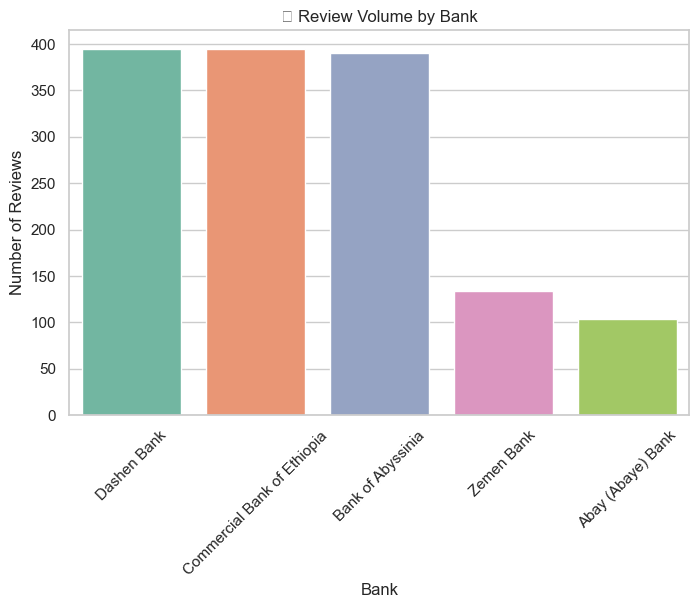

C:\Users\G5\AppData\Local\Temp\ipykernel_11696\1910066630.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_avg.index, y=rating_avg.values, palette="Set3")
d:\10 acadamy\fintech-reviews-analysis\fintech-customer-analytics\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


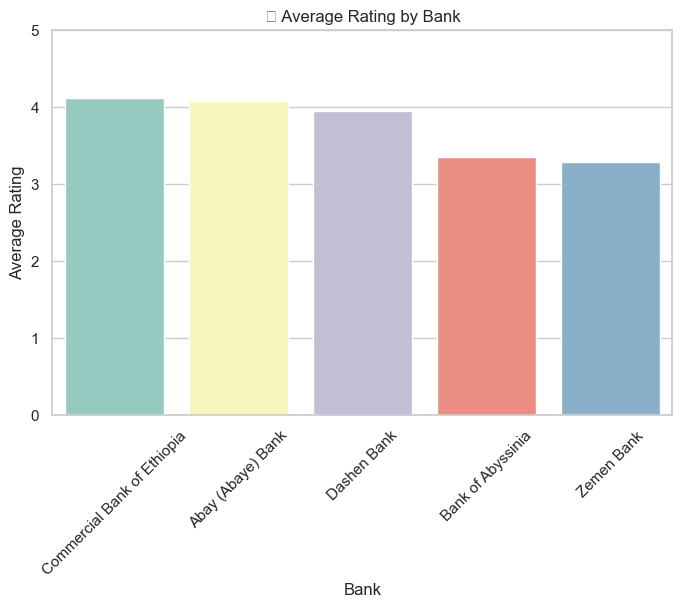

In [7]:
# =============================================================================
# CELL 5: OVERALL DASHBOARD - ALL BANKS
# =============================================================================

print("📊 GENERATING OVERALL DASHBOARD")

# Market share by review volume
bank_counts = df_clean['bank_name'].value_counts()
plt.figure(figsize=(8,5))
sns.barplot(x=bank_counts.index, y=bank_counts.values, palette="Set2")
plt.title("📱 Review Volume by Bank")
plt.ylabel("Number of Reviews")
plt.xlabel("Bank")
plt.xticks(rotation=45)
plt.show()

# Average rating by bank
rating_avg = df_clean.groupby('bank_name')['rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=rating_avg.index, y=rating_avg.values, palette="Set3")
plt.title("⭐ Average Rating by Bank")
plt.ylabel("Average Rating")
plt.xlabel("Bank")
plt.ylim(0,5)
plt.xticks(rotation=45)
plt.show()


📈 GENERATING PER-BANK DASHBOARDS

🏦 BANK: Abay (Abaye) Bank (104 reviews)


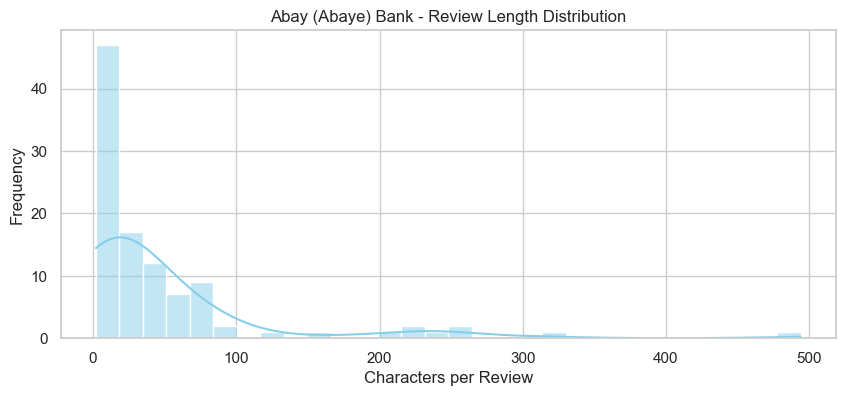

C:\Users\G5\AppData\Local\Temp\ipykernel_11696\4129721295.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=bank_df, palette='Set2')


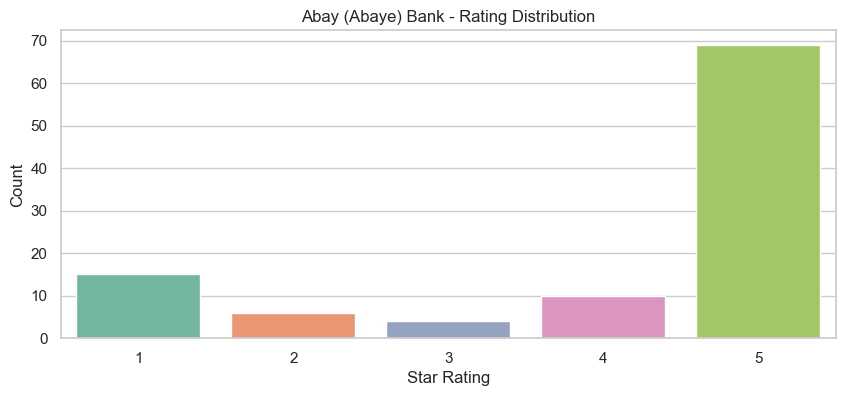


🏦 BANK: Abay Bank (104 reviews)


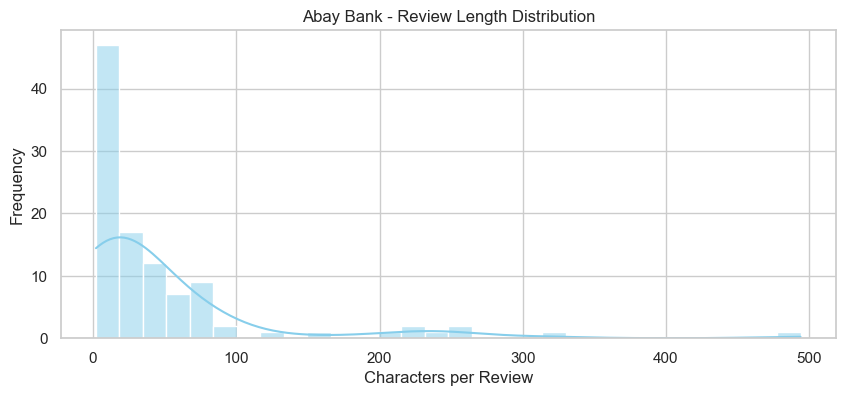

C:\Users\G5\AppData\Local\Temp\ipykernel_11696\4129721295.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=bank_df, palette='Set2')


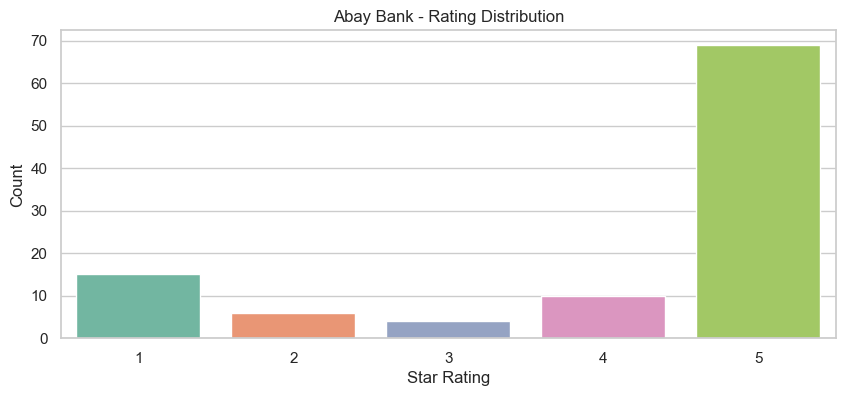


🏦 BANK: Bank of Abyssinia (390 reviews)


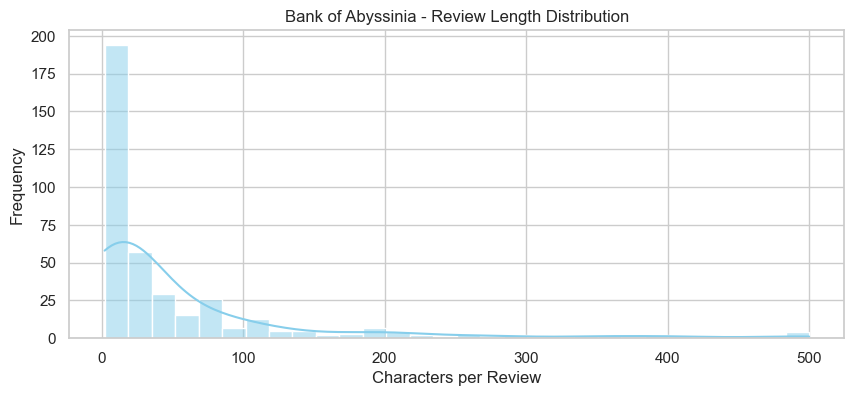

C:\Users\G5\AppData\Local\Temp\ipykernel_11696\4129721295.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=bank_df, palette='Set2')


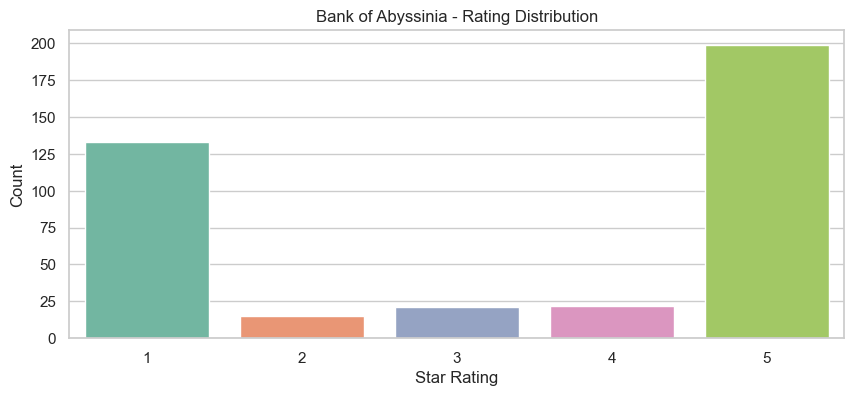


🏦 BANK: Commercial Bank of Ethiopia (394 reviews)


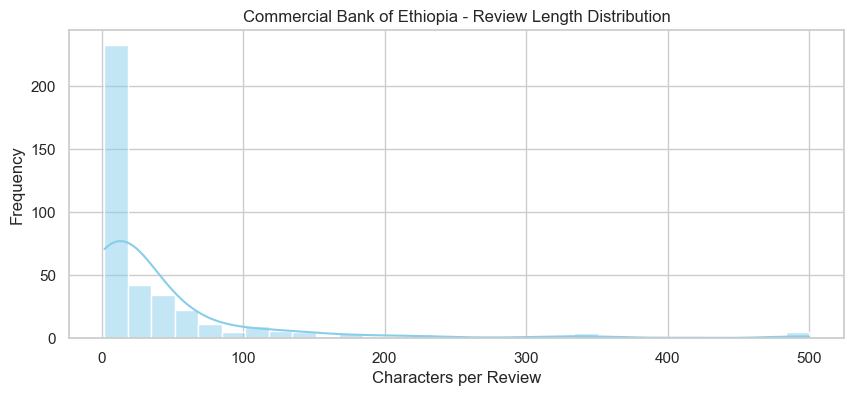

C:\Users\G5\AppData\Local\Temp\ipykernel_11696\4129721295.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=bank_df, palette='Set2')


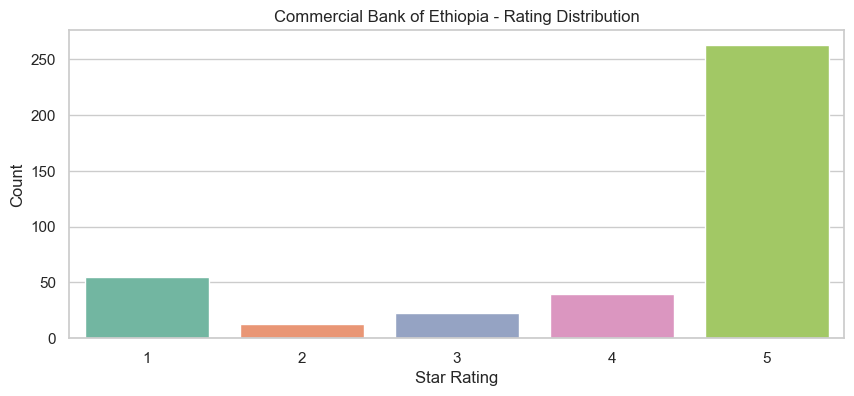


🏦 BANK: Dashen Bank (395 reviews)


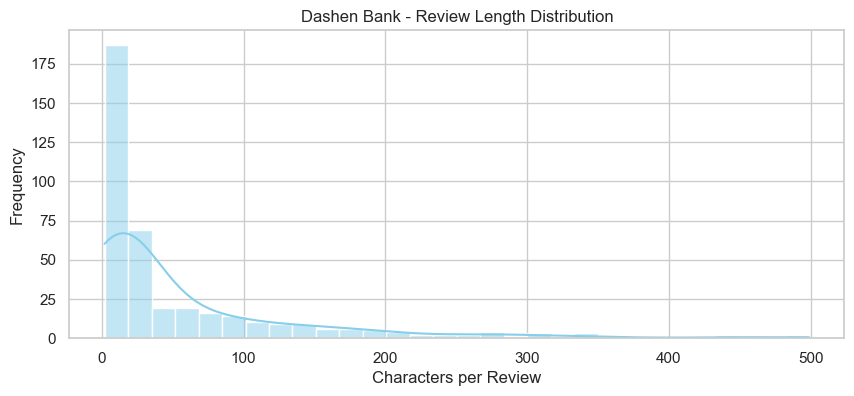

C:\Users\G5\AppData\Local\Temp\ipykernel_11696\4129721295.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=bank_df, palette='Set2')


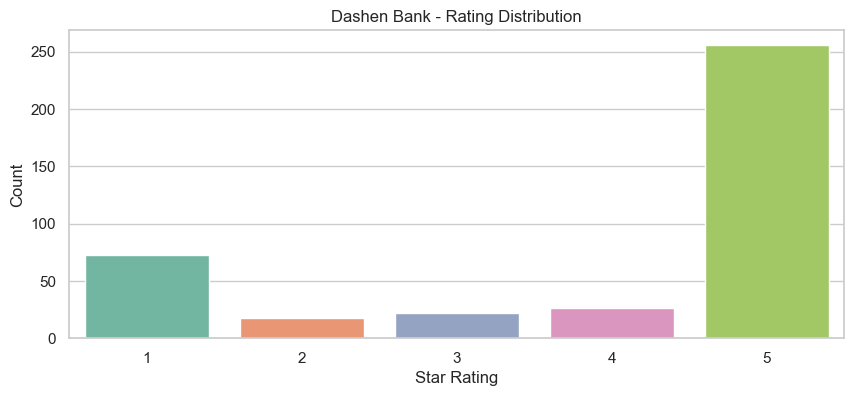


🏦 BANK: Zemen Bank (134 reviews)


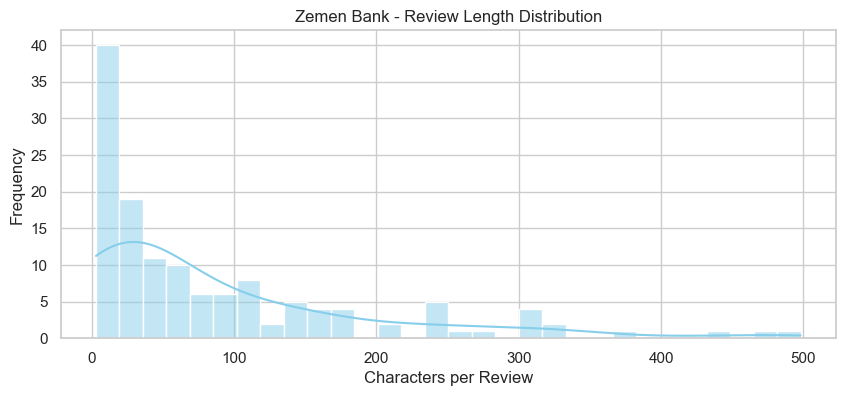

C:\Users\G5\AppData\Local\Temp\ipykernel_11696\4129721295.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=bank_df, palette='Set2')


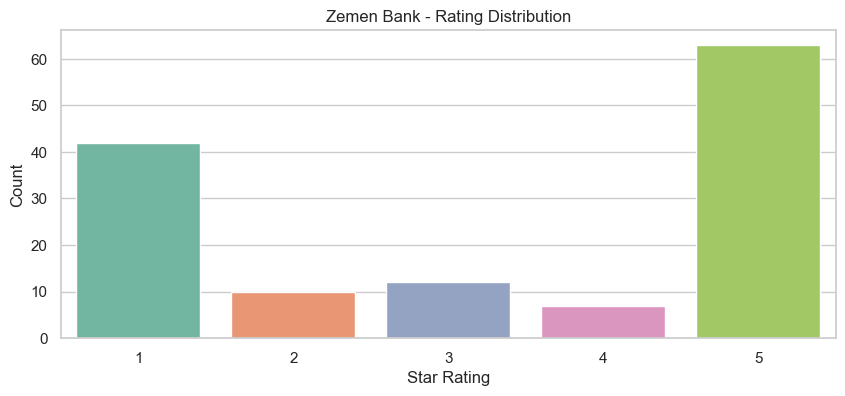

In [8]:
# =============================================================================
# CELL 6: PER-BANK VISUALIZATION FOR PRESENTATIONS
# =============================================================================

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 5)

print("📈 GENERATING PER-BANK DASHBOARDS")

# Set the processed directory where individual bank CSVs are stored
PROCESSED_DIR = os.path.join(project_root, "2_data_pipeline", "data", "processed")

# Load all individual bank CSVs (excluding the combined file)
bank_files = [f for f in os.listdir(PROCESSED_DIR) 
              if f.endswith("_clean_reviews.csv") and f != "all_clean_reviews.csv"]

for file in bank_files:
    bank_df = pd.read_csv(os.path.join(PROCESSED_DIR, file))
    bank_name = bank_df['bank_name'].iloc[0] 

    print(f"\n🏦 BANK: {bank_name} ({len(bank_df):,} reviews)")

    # Review length distribution
    plt.figure(figsize=(10,4))
    sns.histplot(bank_df['review_text'].str.len(), bins=30, kde=True, color='skyblue')
    plt.title(f"{bank_name} - Review Length Distribution")
    plt.xlabel("Characters per Review")
    plt.ylabel("Frequency")
    plt.show()

    # Rating distribution
    plt.figure(figsize=(10,4))
    sns.countplot(x='rating', data=bank_df, palette='Set2')
    plt.title(f"{bank_name} - Rating Distribution")
    plt.xlabel("Star Rating")
    plt.ylabel("Count")
    plt.show()


In [9]:
# =============================================================================
# CELL 7: CUSTOMER BEHAVIOR METRICS
# =============================================================================

print("📊 CALCULATING CUSTOMER BEHAVIOR METRICS")

df_clean['text_length'] = df_clean['review_text'].str.len()
behavior_metrics = df_clean.groupby('bank_name').agg({
    'rating': ['mean','count'],
    'text_length': ['mean','median']
}).round(2)

behavior_metrics.columns = ['Avg Rating','Review Count','Avg Review Length','Median Review Length']
behavior_metrics = behavior_metrics.sort_values('Avg Rating', ascending=False)
behavior_metrics


📊 CALCULATING CUSTOMER BEHAVIOR METRICS


,Avg Rating,Review Count,Avg Review Length,Median Review Length
bank_name,,,,
Commercial Bank of Ethiopia,4.12,394,43.88,14.0
Abay (Abaye) Bank,4.08,104,47.88,21.5
Dashen Bank,3.95,395,56.35,20.0
Bank of Abyssinia,3.36,390,55.71,19.0
Zemen Bank,3.29,134,89.41,43.5


In [10]:
# =============================================================================
# CELL 8: EXECUTIVE SUMMARY & RECOMMENDATIONS
# =============================================================================

print("\n💡 STEP 5: EXECUTIVE INSIGHTS & RECOMMENDATIONS")
print("=" * 60)

# Ensure behavior_metrics has a std column for ratings
if 'Rating Std' not in behavior_metrics.columns:
    behavior_metrics['Rating Std'] = df_clean.groupby('bank_name')['rating'].std().reindex(behavior_metrics.index).fillna(0)

# Calculate strategic insights
top_rated = behavior_metrics['Avg Rating'].idxmax()
highest_volume = behavior_metrics['Review Count'].idxmax()
positive_rate = ((df_clean['rating'] >= 4).sum() / len(df_clean) * 100)

print(f"""
📈 KEY BUSINESS INSIGHTS:

🏆 Performance Leadership:
• {top_rated} leads with highest average rating ({behavior_metrics.loc[top_rated, 'Avg Rating']:.2f}⭐)
• {highest_volume} dominates customer engagement ({behavior_metrics.loc[highest_volume, 'Review Count']} reviews)
• Overall positive sentiment: {positive_rate:.1f}% (4-5 star ratings)

📊 Customer Engagement Metrics:
• Total qualified reviews analyzed: {len(df_clean):,}
• Average review length: {df_clean['text_length'].mean():.0f} characters
• Rating consistency across platforms: {behavior_metrics['Rating Std'].mean():.2f} std dev

🎯 STRATEGIC RECOMMENDATIONS:

1. PRODUCT EXCELLENCE:
   • Benchmark against {top_rated}'s high-rated features
   • Address pain points in 1-3 star reviews immediately
   • Analyze review content for feature improvement opportunities

2. CUSTOMER EXPERIENCE:
   • Increase review response rate (currently {(df_clean['reply_text'].isna().sum() / len(df_clean) * 100):.1f}%)
   • Implement real-time feedback mechanisms
   • Enhance in-app review prompting strategies

3. COMPETITIVE POSITIONING:
   • Leverage {top_rated}'s rating leadership in marketing
   • Address specific customer concerns mentioned in competitor reviews
   • Focus on rating consistency for improved customer trust
""")

print("✅ ANALYSIS COMPLETED SUCCESSFULLY!")
print("🎯 Next: Use these insights to drive customer satisfaction and product improvements")



💡 STEP 5: EXECUTIVE INSIGHTS & RECOMMENDATIONS

📈 KEY BUSINESS INSIGHTS:

🏆 Performance Leadership:
• Commercial Bank of Ethiopia leads with highest average rating (4.12⭐)
• Dashen Bank dominates customer engagement (395 reviews)
• Overall positive sentiment: 67.4% (4-5 star ratings)

📊 Customer Engagement Metrics:
• Total qualified reviews analyzed: 1,417
• Average review length: 55 characters
• Rating consistency across platforms: 1.64 std dev

🎯 STRATEGIC RECOMMENDATIONS:

1. PRODUCT EXCELLENCE:
   • Benchmark against Commercial Bank of Ethiopia's high-rated features
   • Address pain points in 1-3 star reviews immediately
   • Analyze review content for feature improvement opportunities

2. CUSTOMER EXPERIENCE:
   • Increase review response rate (currently 0.0%)
   • Implement real-time feedback mechanisms
   • Enhance in-app review prompting strategies

3. COMPETITIVE POSITIONING:
   • Leverage Commercial Bank of Ethiopia's rating leadership in marketing
   • Address specific cus